# SI 618 Homework #4

## Taylor Swift songs

Last updated 2023-10-04

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.

**NOTE**: Use the dataset from Canvas rather than the dataset from Kaggle, which is updated frequently and may change while you are completing this assignment.

This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Each of the questions is worth the same number of points, except for the final bonus question, which is worth up to an additional 2 points (out of 100).  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

In [ ]:
taylor_spotify = pd.read_csv("/content/taylor_swift_spotify.csv")

In [ ]:
taylor_spotify

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.204000,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.059300,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.133000,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.735000,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.416000,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,Mary's Song (Oh My My My) - Instrumental w/ BG...,Taylor Swift Karaoke,2006-10-24,10,5YluKOG2VGcJMO8XVMpg9h,spotify:track:5YluKOG2VGcJMO8XVMpg9h,0.000081,0.475,0.529,0.562000,0.1460,-10.802,0.0317,151.000,0.3010,5,216226
1261,1261,Our Song - Instrumental w/ BG vocals,Taylor Swift Karaoke,2006-10-24,11,0PHdWHKV69ZNQyfYLBlVAT,spotify:track:0PHdWHKV69ZNQyfYLBlVAT,0.032600,0.528,0.484,0.001650,0.1400,-9.266,0.0316,178.299,0.5850,12,204306
1262,1262,I'm Only Me When I'm With You - Instrumental w...,Taylor Swift Karaoke,2006-10-24,12,4Vg8MqpDQFDfKmXdpO1jD3,spotify:track:4Vg8MqpDQFDfKmXdpO1jD3,0.000053,0.541,0.796,0.820000,0.3260,-8.833,0.0306,144.004,0.8470,5,223386
1263,1263,Invisible - Instrumental w/ BG vocals,Taylor Swift Karaoke,2006-10-24,13,7Fg8MxumrT8axFZVzN1MtT,spotify:track:7Fg8MxumrT8axFZVzN1MtT,0.259000,0.575,0.279,0.572000,0.0941,-12.066,0.0286,96.007,0.1180,4,206480


In [ ]:
taylor_spotify.rename(columns={'uri': 'url'}, inplace=True)

In [ ]:
taylor_spotify['duration_mmss'] = taylor_spotify['duration_ms'].apply(lambda x: f"{x // 60000}:{(x % 60000) // 1000:02}")

In [ ]:
taylor_spotify = taylor_spotify.drop('Unnamed: 0', axis=1)

In [ ]:
taylor_spotify.count()

name                1265
album               1265
release_date        1265
track_number        1265
id                  1265
url                 1265
acousticness        1265
danceability        1265
energy              1265
instrumentalness    1265
liveness            1265
loudness            1265
speechiness         1265
tempo               1265
valence             1265
popularity          1265
duration_ms         1265
duration_mmss       1265
dtype: int64

Q1: Show the distribution of the popularity of the songs.  Then exclude the songs that are from karaoke albums (i.e., the album name contains "karaoke").  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?

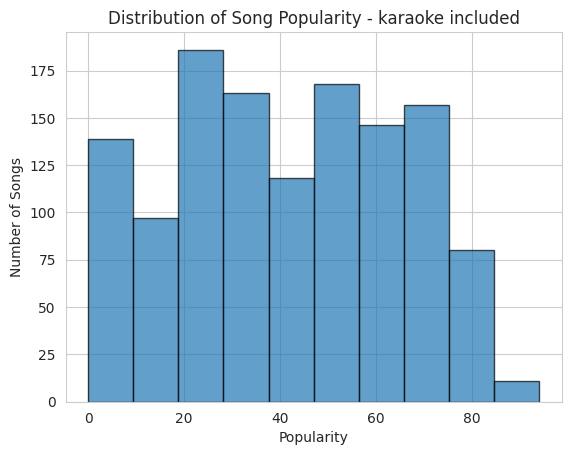

In [ ]:
# Plotting the histogram for popularity
sns.set_style("whitegrid")
plt.hist(taylor_spotify['popularity'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Song Popularity - karaoke included")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.show()

In [ ]:
taylor_swift_spotify = taylor_spotify[~taylor_spotify['album'].str.contains('karaoke', case=False)]

In [ ]:
taylor_swift_spotify.count()

name                1075
album               1075
release_date        1075
track_number        1075
id                  1075
url                 1075
acousticness        1075
danceability        1075
energy              1075
instrumentalness    1075
liveness            1075
loudness            1075
speechiness         1075
tempo               1075
valence             1075
popularity          1075
duration_ms         1075
duration_mmss       1075
dtype: int64

In [ ]:
# cross verify
taylor_swift_spotify[taylor_swift_spotify['album'].str.contains('karaoke', case=False)]

,name,album,release_date,track_number,id,url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_mmss


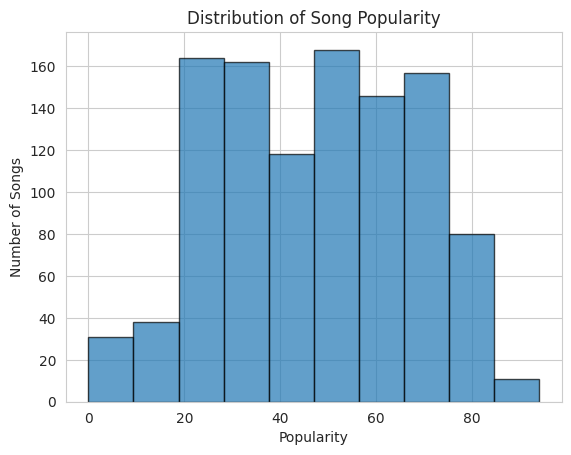

In [ ]:
# Plotting the histogram for popularity
sns.set_style("whitegrid")
plt.hist(taylor_swift_spotify['popularity'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.show()

* from the the two histogram plot above we can observe that that taylors swifts karaoke version songs were not that popular as they lie in the botton two bins majorly. The second histogram (without karaoke included) has a higher number of songs in the 0-10 and 20-30 popularity scores compared to the first one.
* The shape of the distributions is similar but not identical, suggesting that the presence or absence of karaoke songs affects the distribution to some extent.
* The consistent peak around 60-70 popularity in both histograms suggests that this is a common popularity range for songs regardless of whether karaoke songs are included or not.


### <font color='magenta'>IMPORTANT NOTE: the remainder of the questions are based on the songs that are NOT from karaoke albums.</font>

Q2: Report the average track duration for each album.  You answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset.

In [ ]:
average_durations = taylor_swift_spotify.groupby("album")["duration_ms"].mean().round(2)
average_durations = average_durations.to_frame(name='duration').reset_index()

In [ ]:
average_durations['duration'] = average_durations['duration'].apply(lambda x: f"{int(x // 60000)}:{int((x % 60000) // 1000):02}")


In [ ]:
average_durations

,album,duration
0,1989,3:45
1,1989 (Big Machine Radio Release Special),2:37
2,1989 (Deluxe Edition),3:41
3,1989 (Deluxe),3:37
4,Fearless,4:00
5,Fearless (Big Machine Radio Release Special),2:33
6,Fearless (International Version),4:00
7,Fearless (Platinum Edition),4:10
8,Fearless (Taylor's Version),4:05
9,Fearless Platinum Edition,4:10


In [ ]:
#taylor_swift_spotify[taylor_swift_spotify['album'] == '1989'].value_counts()#['duration_ms'].sum()  #8783592/39
#filtered_df = taylor_swift_spotify[taylor_swift_spotify['album'] == '1989']
#num_rows = filtered_df.shape[0]
#print(num_rows)

39


Q3: Show a heatmap of the correlations between the features.  Use a diverging colormap with white in the middle (i.e. white at a correlation of 0.0).

In [ ]:
ct = pd.crosstab(taylor_swift_spotify.danceability, taylor_swift_spotify.energy)

In [ ]:
taylor_swift_spotify # do we make for two at a time or all of them in one?

,name,album,release_date,track_number,id,url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_mmss
0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395,3:22
1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270,3:38
2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690,3:20
3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124,4:16
4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206,3:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,Invisible,Taylor Swift (Big Machine Radio Release Special),2006-10-24,26,76aEO0XTIeZt8bwpo2Zlz2,spotify:track:76aEO0XTIeZt8bwpo2Zlz2,0.5970,0.612,0.384,0.000000,0.1640,-5.731,0.0240,96.020,0.2040,32,205853,3:25
1233,A Perfectly Good Heart - Commentary,Taylor Swift (Big Machine Radio Release Special),2006-10-24,27,0MdvaY1bXQVxkInYNCQc7y,spotify:track:0MdvaY1bXQVxkInYNCQc7y,0.8390,0.644,0.248,0.000000,0.1180,-12.282,0.9310,81.209,0.5600,22,69432,1:09
1234,A Perfectly Good Heart,Taylor Swift (Big Machine Radio Release Special),2006-10-24,28,5BIp0co0t2WOHt1ttmSUrw,spotify:track:5BIp0co0t2WOHt1ttmSUrw,0.0036,0.489,0.760,0.000000,0.1110,-5.713,0.0362,156.088,0.2730,29,222146,3:42
1235,Teardrops On My Guitar - Pop Version / Commentary,Taylor Swift (Big Machine Radio Release Special),2006-10-24,29,0q0YAWyXhDggKzeicHhtfa,spotify:track:0q0YAWyXhDggKzeicHhtfa,0.8810,0.645,0.320,0.000000,0.1490,-11.998,0.9310,80.865,0.7050,23,82400,1:22


In [ ]:
# Compute correlations matrix
correlations = taylor_swift_spotify[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'tempo', 'valence', 'popularity']].corr()

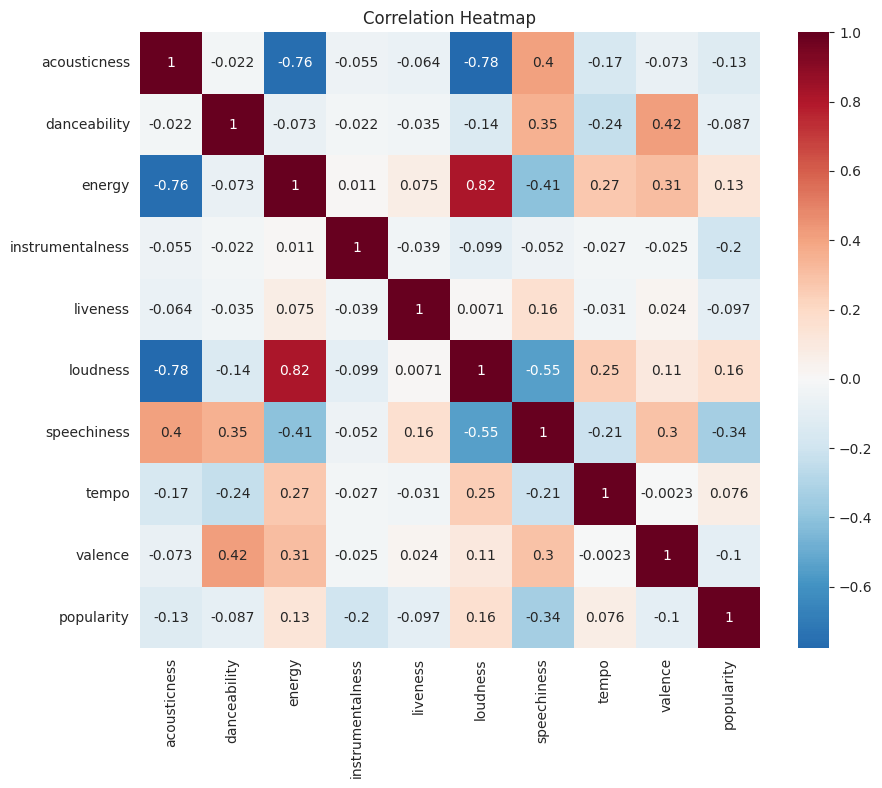

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap')
plt.show()

The graph you've provided is a correlation heatmap, which visualizes the pairwise correlation coefficients between different variables (in this case, musical features). Here's a brief interpretation:

* Strongest Negative Correlations:

"Acousticness" and "Energy" have a correlation of -0.76, indicating that songs that are more acoustic tend to have less energy and vice-versa.
"Acousticness" and "Loudness" have a correlation of -0.78, suggesting that more acoustic songs are generally quieter.

* Strongest Positive Correlations:

"Energy" and "Loudness" have a correlation of 0.82, indicating that songs with more energy are usually louder.
"Valence" (a measure of musical positivity) and "Danceability" have a correlation of 0.42, suggesting that songs that are more danceable are often more positive.

* Weak or No Correlation:

Variables like "Danceability" and "Acousticness" have a correlation of -0.022, which is very close to zero. This suggests that there's little to no linear relationship between these two features.

Q4: List the top 5 correlations between the features of the songs.

In [ ]:
correlations

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
acousticness,1.000000,-0.022470,-0.756873,-0.055139,-0.063505,-0.777471,0.404049,-0.171262,-0.072812,-0.127021
danceability,-0.022470,1.000000,-0.073056,-0.021544,-0.034634,-0.138921,0.350922,-0.240997,0.415063,-0.087231
energy,-0.756873,-0.073056,1.000000,0.010537,0.074975,0.817729,-0.409169,0.266027,0.306586,0.125911
instrumentalness,-0.055139,-0.021544,0.010537,1.000000,-0.038933,-0.098910,-0.052273,-0.026519,-0.024569,-0.197000
liveness,-0.063505,-0.034634,0.074975,-0.038933,1.000000,0.007121,0.163912,-0.030562,0.023628,-0.096685
loudness,-0.777471,-0.138921,0.817729,-0.098910,0.007121,1.000000,-0.549766,0.249124,0.108877,0.160417
speechiness,0.404049,0.350922,-0.409169,-0.052273,0.163912,-0.549766,1.000000,-0.210773,0.298715,-0.337974
tempo,-0.171262,-0.240997,0.266027,-0.026519,-0.030562,0.249124,-0.210773,1.000000,-0.002296,0.076331
valence,-0.072812,0.415063,0.306586,-0.024569,0.023628,0.108877,0.298715,-0.002296,1.000000,-0.102781
popularity,-0.127021,-0.087231,0.125911,-0.197000,-0.096685,0.160417,-0.337974,0.076331,-0.102781,1.000000


In [ ]:
correlations_top5 = correlations.stack().reset_index()
correlations_top5.columns = ['feature_1', 'feature_2', 'corr']
correlations_top5 = correlations_top5[correlations_top5['feature_1'] != correlations_top5['feature_2']]
correlations_top5 = correlations_top5.sort_values('corr', ascending=False)
correlations_top5 = correlations_top5.iloc[::2]
correlations_top5.head()

,feature_1,feature_2,corr
52,loudness,energy,0.817729
18,danceability,valence,0.415063
60,speechiness,acousticness,0.404049
61,speechiness,danceability,0.350922
82,valence,energy,0.306586


Q5: Does the position of the track on the album (i.e. track number) have an effect on the popularity of the song?  Use both visual and statistical evidence to support your answer.

In [ ]:
#taylor_swift_spotify[taylor_swift_spotify['album'] == '1989'].value_counts()#['duration_ms'].sum()  #8783592/39
filtered_df = taylor_swift_spotify[taylor_swift_spotify['album'] == '1989']
filtered_df

,name,album,release_date,track_number,id,url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_mmss
506,Welcome To New York,1989,2014-10-27,1,6qnM0XXPZOINWA778uNqQ9,spotify:track:6qnM0XXPZOINWA778uNqQ9,0.03800,0.793,0.634,0.000002,0.3040,-4.807,0.0324,117.024,0.6150,66,212600,3:32
507,Blank Space,1989,2014-10-27,2,1p80LdxRV74UKvL8gnD7ky,spotify:track:1p80LdxRV74UKvL8gnD7ky,0.08500,0.753,0.678,0.000002,0.1300,-5.421,0.0644,96.006,0.5830,80,231826,3:51
508,Style,1989,2014-10-27,3,4lIxdJw6W3Fg4vUIYCB0S5,spotify:track:4lIxdJw6W3Fg4vUIYCB0S5,0.00253,0.598,0.786,0.001600,0.1170,-5.572,0.0383,95.019,0.4560,79,231000,3:51
509,Out Of The Woods,1989,2014-10-27,4,5OndtwLGA9O6XHFcGm2H7r,spotify:track:5OndtwLGA9O6XHFcGm2H7r,0.00103,0.552,0.842,0.000012,0.3370,-6.938,0.0373,91.991,0.3430,70,235800,3:55
510,All You Had To Do Was Stay,1989,2014-10-27,5,0dAb8TY433dl3ZfXYCLE19,spotify:track:0dAb8TY433dl3ZfXYCLE19,0.00196,0.602,0.736,0.000046,0.1050,-5.778,0.0338,96.969,0.4710,66,193293,3:13
511,Shake It Off,1989,2014-10-27,6,5xTtaWoae3wi06K5WfVUUH,spotify:track:5xTtaWoae3wi06K5WfVUUH,0.05610,0.647,0.785,0.000000,0.1480,-5.414,0.1650,160.015,0.9430,77,219200,3:39
512,I Wish You Would,1989,2014-10-27,7,3wmN11qXGL0HyPojvEE1D9,spotify:track:3wmN11qXGL0HyPojvEE1D9,0.01600,0.648,0.898,0.000099,0.1090,-5.963,0.0513,118.020,0.5020,61,207440,3:27
513,Bad Blood,1989,2014-10-27,8,273dCMFseLcVsoSWx59IoE,spotify:track:273dCMFseLcVsoSWx59IoE,0.08710,0.650,0.802,0.000007,0.1480,-6.114,0.1810,170.146,0.2950,74,211933,3:31
514,Wildest Dreams,1989,2014-10-27,9,59HjlYCeBsxdI0fcm3zglw,spotify:track:59HjlYCeBsxdI0fcm3zglw,0.07020,0.554,0.666,0.005930,0.1060,-7.414,0.0747,140.056,0.4720,75,220440,3:40
515,How You Get The Girl,1989,2014-10-27,10,4dYUOfmWna6DFccnz732n8,spotify:track:4dYUOfmWna6DFccnz732n8,0.00461,0.764,0.660,0.004770,0.0915,-6.136,0.0494,119.988,0.5240,58,247533,4:07


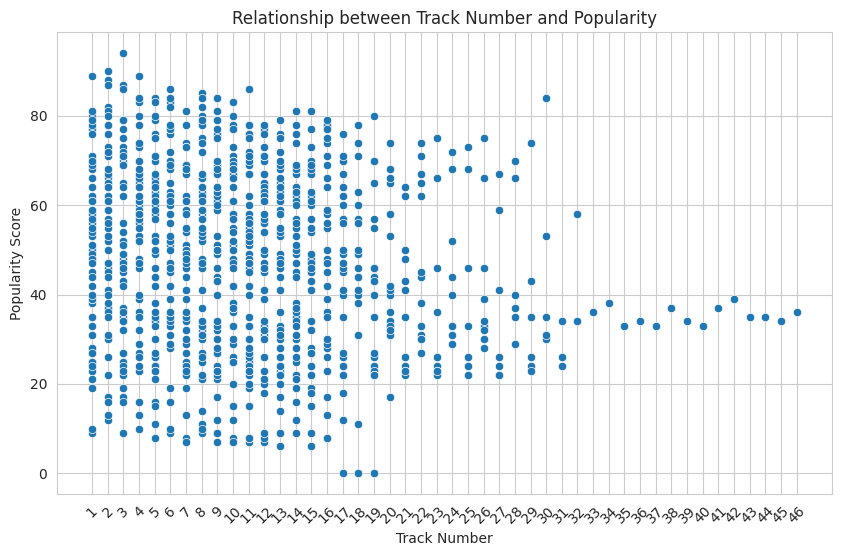

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='track_number', y='popularity', data=taylor_swift_spotify)
plt.title('Relationship between Track Number and Popularity')
plt.xlabel('Track Number')
plt.ylabel('Popularity Score')

# Setting x-ticks to whole numbers
max_track_number = taylor_swift_spotify['track_number'].max()
plt.xticks(ticks=range(1, max_track_number+1),rotation = 45)

plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols("popularity	~ track_number", data = taylor_swift_spotify).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     33.51
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           9.28e-09
Time:                        06:01:38   Log-Likelihood:                -4732.3
No. Observations:                1075   AIC:                             9469.
Df Residuals:                    1073   BIC:                             9479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.3687      1.066     49.111      0.000      50.276      54.461
track_number    -0.4624      0.080     -5.789      0.000      -0.619      -0.306
==============================================================================
Omnibus:                      115.980   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.834
Skew:                          -0.106   Prob(JB):                     2.73e-08
Kurtosis:                       2.144   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Visual Analysis:
* From the scatter plot titled "Relationship between Track Number and Popularity", we can observe the following:

There's a spread of popularity scores across all track numbers.
There seems to be a slight decline in popularity as the track number increases.
However, there's no clear-cut trend or pattern that suggests a strong relationship between track number and popularity based on visual observation.
2. Statistical Analysis:
* From the OLS Regression Results:

  * R-squared: This value is 0.030, which means that only 3% of the variation in popularity can be explained by the track number. This is a low value, indicating a weak relationship.
  * Adjusted R-squared: It is slightly lower at 0.029, confirming the weak relationship.
  * Coefficient for track_number: The coefficient value is -0.4624. This means for every increase in track number by one unit, the popularity score tends to decrease by approximately 0.4624 units, on average.
  * P-value for track_number: The p-value is 0.000, which is less than the common significance level of 0.05. This means that the relationship between track number and popularity is statistically significant, even if it might be practically weak.


Conclusion:
Based on the visual and statistical evidence:

* There is a statistically significant negative relationship between track number and popularity, meaning that as the track number increases, the popularity tends to decrease slightly.
* However, the effect size (or strength) of this relationship is weak, as indicated by the low R-squared value. This means that while track number might have some influence on popularity, there are likely many other factors at play that contribute to a song's popularity.
The scatter plot further reinforces this, showing a spread of popularity scores across all track numbers, without a clear-cut trend.

Q6: Are popular songs more danceable?
Divide the songs into popular (i.e. those with a popularity rating of 60 or higher) and less popular (i.e. those with a popularity rating of less than 60).
Conduct an ANOVA test for the two groups of data based on danceability feature. Are they statistically significant?

In [ ]:
# Filter rows with null values in the 'danceability' column
null_danceability_rows = taylor_swift_spotify[taylor_swift_spotify['danceability'].isnull()]

print(null_danceability_rows)

Empty DataFrame
Columns: [name, album, release_date, track_number, id, url, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms, duration_mmss]
Index: []


In [ ]:
# Split the data into popular and less popular based on the popularity rating
popular_songs = taylor_swift_spotify[taylor_swift_spotify['popularity'] >= 60]
less_popular_songs = taylor_swift_spotify[taylor_swift_spotify['popularity'] < 60]


In [ ]:
less_popular_songs

In [ ]:
popular_songs

In [63]:
res = ols('danceability ~ popularity',popular_songs).fit()
anova_1 = sm.stats.anova_lm(res, typ=2)
print(res.summary())
anova_1


                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     14.87
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           0.000138
Time:                        16:33:43   Log-Likelihood:                 273.23
No. Observations:                 345   AIC:                            -542.5
Df Residuals:                     343   BIC:                            -534.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3570      0.059      6.041      0.0

,sum_sq,df,F,PR(>F)
popularity,0.179622,1.0,14.866774,0.000138
Residual,4.144174,343.0,NaN,NaN


In [62]:
res_2 = ols('danceability ~ popularity',less_popular_songs).fit()
anova_2 = sm.stats.anova_lm(res_2, typ=2)
print(res_2.summary())
anova_2

                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     11.76
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           0.000641
Time:                        16:33:40   Log-Likelihood:                 565.69
No. Observations:                 730   AIC:                            -1127.
Df Residuals:                     728   BIC:                            -1118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6362      0.012     54.963      0.0

,sum_sq,df,F,PR(>F)
popularity,0.146519,1.0,11.755968,0.000641
Residual,9.073362,728.0,NaN,NaN


for the first model:

let's break down the OLS (Ordinary Least Squares) regression results.

* Dependent Variable (Dep. Variable): The response or the outcome variable that we are trying to predict or explain. In this case, it's "danceability".

* R-squared: This is a measure of how well the independent variables explain the variation in the dependent variable. It's 0.042, meaning the model explains about 4.2% of the variance in danceability. This is relatively low.

* F-statistic and Prob (F-statistic): The F-statistic tests the hypothesis that all coefficients (except the intercept) are equal to zero. An F-statistic of 14.87 with a very low p-value (0.000138) indicates that at least one of the predictors is significant.

Coefficients Table:

* Intercept: The predicted value of danceability when all predictors are 0. It's 0.3570 and is highly significant (p<0.05).
  * popularity: For each unit increase in popularity, danceability is predicted to increase by 0.0032 units, holding all else constant. This coefficient is also significant (p<0.05).

  * Cond. No.: A measure of multicollinearity. Large values (>20) may indicate unstable estimates due to multicollinearity.

For the second model: here's the analysis of the OLS regression results:

* Overview:

  * Dependent Variable: The model aims to explain the variance in the danceability of tracks.
  * Predictor: The only predictor in the model is popularity.
  * Type of Model: This is an Ordinary Least Squares (OLS) regression, which is a linear regression model.
* Model Fit:

  * R-squared: 0.016, meaning that only 1.6% of the variance in danceability can be explained by popularity. This is a low R-squared, suggesting that popularity alone may not be a good predictor for danceability or other important variables might be missing.
  * Adj. R-squared: 0.015, which is almost the same as R-squared, indicating that there isn't much penalty for including the predictor in the model.
  * F-statistic & Prob(F-statistic): The F-statistic is 11.76, with a p-value of 0.000641. This means that the model is statistically significant, suggesting that there's some relationship between popularity and danceability, even if the R-squared is low.
* Coefficients:

  * Intercept (0.6362): When popularity is zero, the predicted danceability is 0.6362.
  * popularity (-0.0010): For every unit increase in popularity, danceability decreases by 0.0010 units, on average. The relationship is negative and statistically significant (p<0.05).


Statistical Significance:

Both the intercept and the popularity coefficient are statistically significant (p-values < 0.05), suggesting that there's evidence to reject the null hypothesis for both terms.

Q7: Create a regression model with "popularity" as the dependent variable and "liveness" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "popularity" when the value of "liveness" is 0.22.

In [ ]:
model_lm = sm.ols('popularity ~ liveness', data=taylor_swift_spotify).fit()
model_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.12
Date:                Thu, 12 Oct 2023   Prob (F-statistic):            0.00150
Time:                        15:55:44   Log-Likelihood:                -4743.8
No. Observations:                1075   AIC:                             9492.
Df Residuals:                    1073   BIC:                             9502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8667      1.017     49.048      0.000      47.872      51.862
liveness     -16.1986      5.091     -3.182      0.002     -26.188      -6.210
==============================================================================
Omnibus:                      183.152   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.318
Skew:                          -0.056   Prob(JB):                     1.07e-09
Kurtosis:                       2.046   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
r2 = model_lm.rsquared
r2

0.00934790425683385

In [58]:
liveness = 0.22
predicted_popularity = -16.1986*liveness + 49.8667
predicted_popularity

46.303008000000005

here's a diagnosis of the OLS regression model:

* Model Explanation: The model aims to predict the 'popularity' based on the variable 'liveness'.

  * R-squared & Adjusted R-squared: The R-squared value is 0.009, which means that only 0.9% of the variance in 'popularity' can be explained by 'liveness'. The adjusted R-squared (which takes into account the number of predictors in the model) is slightly less at 0.008. This suggests that 'liveness' does not provide a strong predictive power for 'popularity'.

* Coefficients:

  * Intercept (49.8667): This is the expected value of 'popularity' when 'liveness' is 0.
  * liveness (-16.1986): For every unit increase in 'liveness', the 'popularity' is expected to decrease by approximately 16.1986 units, holding all else constant. This coefficient is statistically significant (p < 0.05).
  * Model Significance: The F-statistic is 10.12 with a very low p-value (0.00150). This means that the model is statistically significant, and at least one of the predictors (in this case, only 'liveness') is significant in predicting the response variable.

Q8: Due to intellectual property conflicts, Taylor Swift re-recorded some of her earlier albums, including `Fearless` and `Red`.  We assume that re-recording her early albums will allow Taylor Swift to reclaim her artistry control, revisit the songs and make any changes she wants. Therefore, we want to see whether the new songs are more loved by the audiences by looking at the popularity score.

* The re-recorded ones have `(Taylor’s version)` at the end of the album name.

a) Create a visualization that shows the distribution of popularity scores of original vs. re-recorded songs.  There are multiple visualizations that would be appropriate here.  You can choose any of them.  At a minimum, you should create one visualization.  Creating additional ones can earn you additional points.

b) Is there a statistically significant difference between the popularity scores of the original and re-recorded songs?  If so, which one is more popular?  How much more popular is it, on average?

To visualize the distribution of popularity scores of original vs. re-recorded songs, a boxplot or violin plot can be a good choice. These plots will show you the median, interquartile range, and any potential outliers in the popularity scores.

<ipython-input-64-7f1163be8844>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taylor_swift_spotify['version'] = taylor_swift_spotify['album'].apply(lambda x: 'Re-recorded' if "Taylor’s version" in x else 'Original' if 'Taylor Swift' in x else 'Other')


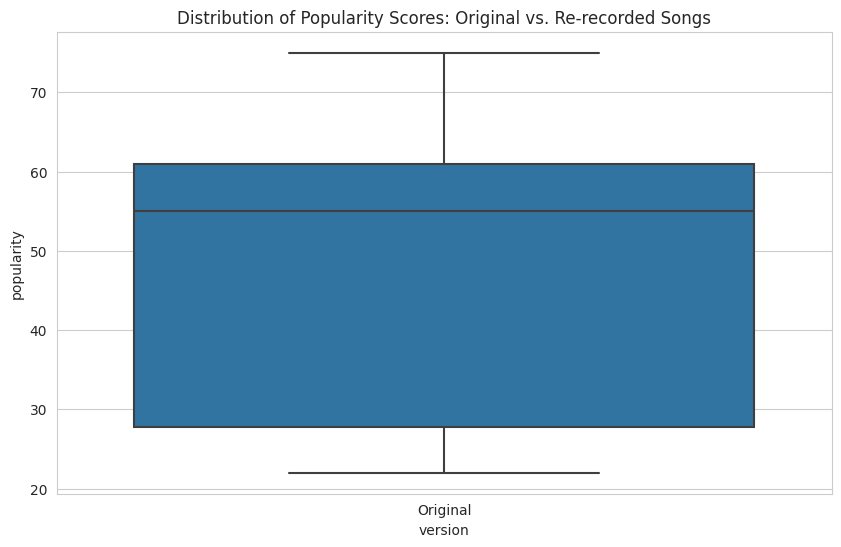

In [64]:
taylor_swift_spotify['version'] = taylor_swift_spotify['album'].apply(lambda x: 'Re-recorded' if "Taylor’s version" in x else 'Original' if 'Taylor Swift' in x else 'Other')

# Filtering out only Taylor Swift's songs for the visualization
df_taylor = taylor_swift_spotify[taylor_swift_spotify['version'] != 'Other']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='version', y='popularity', data=df_taylor)
plt.title('Distribution of Popularity Scores: Original vs. Re-recorded Songs')
plt.show()

b) Statistical Significance:

To determine if there's a statistically significant difference between the popularity scores of the original and re-recorded songs, we can use a two-sample t-test.

In [68]:

# Separate the two groups
original_scores = df_taylor[df_taylor['version'] == 'Original']['popularity']
re_recorded_scores = df_taylor[df_taylor['version'] == 'Re-recorded']['popularity']

# Perform the t-test
t_stat, p_value = ttest_ind(original_scores, re_recorded_scores)

# Determine if the result is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant.")
    mean_diff = re_recorded_scores.mean() - original_scores.mean()
    if mean_diff > 0:
        print(f"Re-recorded songs are more popular by an average of {mean_diff:.2f} points.")
    else:
        print(f"Original songs are more popular by an average of {-mean_diff:.2f} points.")
else:
    print("The difference is not statistically significant.")


The difference is not statistically significant.


BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the popularity of football](https://duckduckgo.com/?q=taylor+swift+football&atb=v314-1&ia=web)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?

Determining if Taylor Swift has had an effect on the popularity of football is a complex endeavor that requires careful consideration of confounding variables and factors. Here's a general approach:

1. Data Collection:
 * Time Series Data of Football Popularity: This could be TV ratings for football games, search interest over time (using tools like Google Trends), ticket sales for matches, or social media mentions.
 * Taylor Swift's Football-related Activities Data: Dates and details when Taylor Swift might have mentioned football, attended games, or was somehow involved with football.
 * General Popularity Metrics for Taylor Swift: Album sales, concert ticket sales, social media activity, and mentions. This helps to gauge her influence during different periods.
 * Other Relevant Factors: Events that could influence football's popularity like World Cup, major controversies, other celebrities' involvement, etc.
2. Analysis:
 * Descriptive Analysis: Understand the data, find trends, and summarize.
 * Event Study Analysis: Look at the football popularity metrics around the time of Taylor Swift's involvement. Is there a spike in interest?
 * Time Series Analysis: Compare the popularity of football before and after Taylor Swift's involvement. Tools like ARIMA can be used for this. One can also employ Granger causality tests to determine if Taylor Swift's popularity Granger-causes football's popularity.
 * Control Variables: It's crucial to control for other variables that might explain the surge in football's popularity. Regression analysis with control variables (like other major events) can help.
 * Sentiment Analysis (Optional): If using social media data, a sentiment analysis could reveal whether her involvement had a positive or negative effect.

3. Expected Results:
 * Direct Correlation: If every time Taylor Swift was involved with football and there was a marked increase in its popularity, it might be indicative of a connection.
 * Lagged Effect: It's possible the effect isn't immediate but occurs after a short duration.
 * No Correlation: If there's no discernible change in football's popularity metrics around Taylor Swift's involvement, she likely hasn't had a notable effect.


### Submit your completed assignment in both IPYNB and HTML formats.